# Projeto 1 - Introdução Ciências de Dados

Dupla: Rubens Lima(rnl2) e Caio Possídio (cpv)

## Passo 1 - Coleta de Dados
Para a coleta de dados utilizamos um csv do Kaggle do dataset do FC 24

Primeiramente vamos importat a biblioteca de pandas

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/rubdelima/if697-intro-data-science/main/male_players.csv')

df.head()

<ipython-input-27-07ff38e00276>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/rubdelima/if697-intro-data-science/main/male_players.csv')


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


## Passo 2 - Pré-Processamento de Dados


### 2.0 - Removendo dados inúteis e Criando classes


#### 2.0.1 - Removendo colunas que não vão ajudar na análise

In [28]:
inutil_labels = [
    'player_id','player_url', 'fifa_version', 'fifa_update','update_as_of','short_name','long_name','potential','value_eur','wage_eur','age','dob',
    'height_cm','weight_kg','club_team_id','club_name','league_id','league_name','league_level','club_position','club_jersey_number','club_loaned_from','club_joined_date',
    'club_contract_valid_until_year','nationality_id','nationality_name','nation_team_id','nation_position','nation_jersey_number','preferred_foot','weak_foot','skill_moves',
    'international_reputation','work_rate','body_type','real_face','release_clause_eur','player_tags','player_traits','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
    'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed',
    'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

df.drop(df[df['player_positions'] == 'GK'].index, inplace=True)
df = df.drop(inutil_labels, axis=1)
df.head()

,player_positions,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,"ST, LW",91,97.0,90.0,80.0,92.0,36.0,78.0,78,94,...,83,64,38,93,83,84,88.0,26,34,32
1,ST,91,89.0,93.0,66.0,80.0,45.0,88.0,47,96,...,86,87,43,96,74,84,87.0,38,47,29
2,"CM, CAM",91,72.0,88.0,94.0,87.0,65.0,78.0,95,85,...,92,75,66,88,95,83,88.0,66,70,53
3,"CF, CAM",90,80.0,87.0,90.0,94.0,33.0,64.0,83,89,...,90,44,40,91,92,75,96.0,20,35,24
4,"CF, ST",90,79.0,88.0,83.0,87.0,39.0,78.0,75,91,...,81,63,39,92,90,85,90.0,43,24,18


#### 2.0.2 - Criando novas classes para dos dados
No dateset que pegamos o valor da posição do jogador poderia ser tanto uma lista de string como um uma string. Além disso também algumas posições de jogadores são muito similares como RDM, CDM e LDM, LB e RB, só alterando o lado do jogador do campo, mas isso não interfere nos valores do calculo da posição do jogador.

Então criamos uma função para simplificar os dados, é retornado uma "normalização" da posição dependendo caso seja uma lista, é pego o


In [29]:
# Selecionado apenas uma posição

positions_dict = {
 'CAM' : "Meia Atacante",
 'CB' : "Zagueiro",
 'CDM' : "Volante",
 'CF' : "Segundo Atacante",
 'CM' : "Meia",
 'LB' : "Lateral",
 'LM' : "Meia Aberto",
 'LW' : "Ponta",
 'LWB' : "Ala",
 'RB' : "Lateral",
 'RM' : "Meia Aberto",
 'RW' : "Ponta",
 'RWB' : "Ala",
 'ST' : "Atacante",
 "GK" : "Goleiro"
}

def select_prefeer_position(data:str):
  if "," in data:
    data =  data.split(",")[0]
  return positions_dict[data]

df["player_positions"] =  df["player_positions"].apply(select_prefeer_position)



#### 2.0.3 - Removendo os goleiro
Os goleiros possuem atributos próprios de goleiro, tendo seu Overall definido por eles, não levando em conta os outros atributos

In [30]:
# Removendo os goleiros
df.drop(df[df['player_positions'] == 'GK'].index, inplace=True)
df.head(10)

,player_positions,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,Atacante,91,97.0,90.0,80.0,92.0,36.0,78.0,78,94,...,83,64,38,93,83,84,88.0,26,34,32
1,Atacante,91,89.0,93.0,66.0,80.0,45.0,88.0,47,96,...,86,87,43,96,74,84,87.0,38,47,29
2,Meia,91,72.0,88.0,94.0,87.0,65.0,78.0,95,85,...,92,75,66,88,95,83,88.0,66,70,53
3,Segundo Atacante,90,80.0,87.0,90.0,94.0,33.0,64.0,83,89,...,90,44,40,91,92,75,96.0,20,35,24
4,Segundo Atacante,90,79.0,88.0,83.0,87.0,39.0,78.0,75,91,...,81,63,39,92,90,85,90.0,43,24,18
5,Atacante,90,75.0,91.0,80.0,87.0,44.0,84.0,76,93,...,84,81,49,94,81,90,88.0,35,42,19
7,Atacante,90,69.0,93.0,84.0,83.0,49.0,83.0,80,95,...,87,80,42,94,87,92,92.0,46,46,38
8,Ponta,89,95.0,82.0,78.0,90.0,29.0,68.0,78,89,...,80,58,26,87,81,65,79.0,32,25,18
10,Volante,89,58.0,73.0,80.0,80.0,85.0,84.0,63,64,...,82,83,84,75,82,62,85.0,88,87,78
11,Zagueiro,89,62.0,39.0,66.0,69.0,89.0,87.0,54,29,...,26,93,86,39,51,45,81.0,91,91,87


### 2.1 - Defininição de Tipos

In [31]:
# @markdown Vamos primeiramente identificar quais os tipos de dados que temos no nosso datastet
print("Tipos no dataset")
print(df.dtypes)

# @markdown Verificamos que nossos dados possuem object (as classes), e tipos numéricoscomo int64 e float64, mas queremos apenas int64

# @markdown Mas antes de fazermos a conversão, vamos identificar se precisamos fazer uma limpeza de dados

# @markdown Vmaos verificar agora se em players_positions há apenas str
print(df['player_positions'].apply(type).value_counts())

# @markdown Podemos observar que só há itens que são do tipo str, logo todos os dados da coluna são String e não precisamos mais de tratamento


Tipos no dataset
player_positions                object
overall                          int64
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration            int64
movement_sprint_speed            int64
movement_agility                 int64
movement_reactions               int64
movement_balance                 int64
power_shot_power                 int64
power_jumping                    int64
power_st

In [32]:

# @markdown Mas antes de fazermos a conversão, vamos identificar se precisamos fazer uma limpeza de dados

# @markdown Vmaos verificar agora se em players_positions há apenas str
print(df['player_positions'].apply(type).value_counts())

# @markdown Podemos observar que só há itens que são do tipo str, logo todos os dados da coluna são String e não precisamos mais de tratamento


player_positions
<class 'str'>    159997
Name: count, dtype: int64


### 2.2 - Tratamento de dados ausentes

#### 2.2.1 - Verificando se há arquivos NaN ou nulos no dataframe

In [33]:
# Verificarndo valores NaN
has_nan = df.isnull().values.any()
print(f"Existem valores NaN no DataFrame? {has_nan}")

# Verificando valores Infinitos
numeric_cols = df.select_dtypes(include=[np.number]).columns

has_inf = np.isinf(df[numeric_cols].values).any()
print(f"Existem valores infinitos no DataFrame? {has_inf}")

Existem valores NaN no DataFrame? True
Existem valores infinitos no DataFrame? False


#### 2.2.2 - Removendo NaN por mediana nos campos

In [34]:
# Vamos criar um df com os dados originais mas com um drop pos  itens NaN
df_without_nan = df.dropna()

# Preencher valores ausentes com a mediana nas colunas numéricas
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verificando se ainda temos NaN no dataset
has_nan = df.isnull().values.any()
print(f"Existem valores NaN no DataFrame? {has_nan}")

Existem valores NaN no DataFrame? False


### 2.3 - Normalização e Discretização

No caso a Discretização não se aplica ao nosso dataset

In [35]:
#@title 2.3.2 - Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### 2.4 - Limpeza de Dados

#### 2.4.1 - Univariado: Identificação e tratamento de outliers

In [36]:
df['pace'].describe()

count    159997.000000
mean          0.619195
std           0.145577
min           0.000000
25%           0.539474
50%           0.631579
75%           0.723684
max           1.000000
Name: pace, dtype: float64

<Axes: >

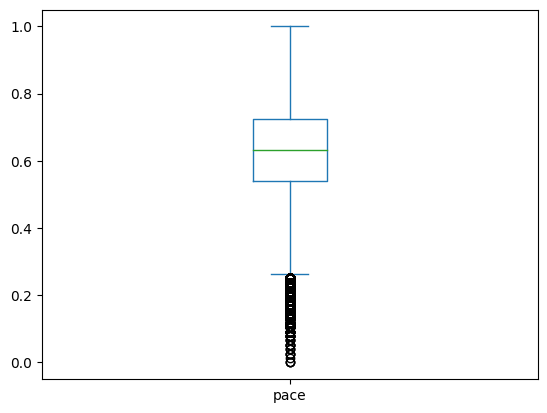

In [37]:
df['pace'].plot.box()

<Axes: >

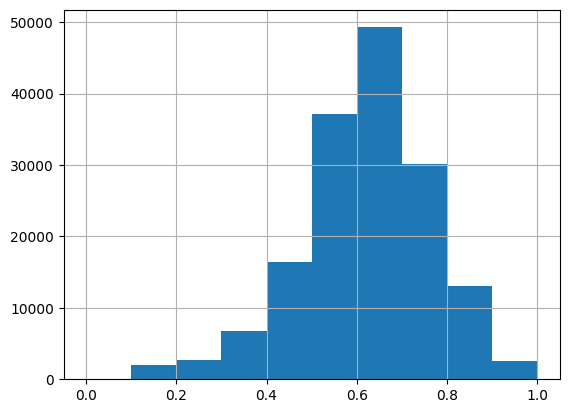

In [38]:
df['pace'].hist()

In [39]:
from scipy import stats
import matplotlib.pyplot as plt

# Função para identificar outliers usando o método de Tukey
def identify_outliers_tukey(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Função para identificar outliers usando Z-score robusto
def identify_outliers_zscore_robust(df, column, threshold=3.5):
    median = df[column].median()
    mad = (df[column] - median).abs().median()
    z_score_robust = 0.6745 * (df[column] - median) / mad
    outliers = df[z_score_robust.abs() > threshold]
    return outliers

univar_outl_indices = set()

for col in numeric_cols:
    outliers_tukey = identify_outliers_tukey(df, col)
    outliers_zscore_robust = identify_outliers_zscore_robust(df, col)

    if not outliers_tukey.empty:
        univar_outl_indices.update(outliers_tukey.index)
    if not outliers_zscore_robust.empty:
        univar_outl_indices.update(outliers_zscore_robust.index)

print(f"Em {len(univar_outl_indices)} linhas foram encontrados outliers.")

# Remover as linhas com outliers do DataFrame
df_cleaned = df.drop(index=univar_outl_indices)

print(f"Tamanho original do DataFrame: {df.shape[0]} linhas")
print(f"{100 - (100*df_cleaned.shape[0]/df.shape[0])}% das linhas possuem outliers e foram removidos")

# Visualização do DataFrame limpo
df = df_cleaned

Em 26246 linhas foram encontrados outliers.
Tamanho original do DataFrame: 159997 linhas
16.404057576079552% das linhas possuem outliers e foram removidos


<Axes: >

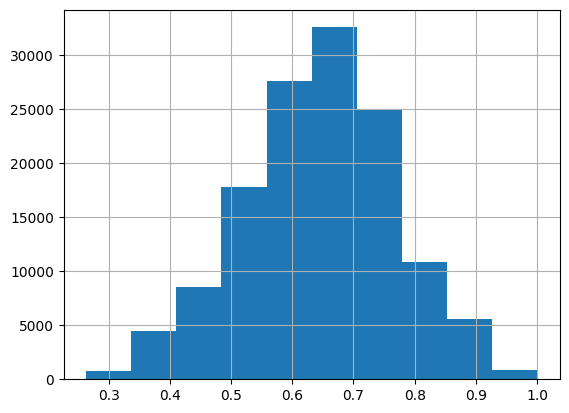

In [40]:
df['pace'].hist()

Fizemos duas funções para verificar seno código foi encontrado algum outlierusandoométodo de z-score robusto ou por meio de tukey

### 2.4.2 - Multivariados

Primeiramente vamos identificar quais pares estão  bêm inteligados na realação binária

In [41]:
correlation_matrix  = df[numeric_cols].corr(method='spearman')
threshold = 0.9
high_corr_pairs = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if (abs(correlation_matrix.loc[row, col]) > threshold and row != col) and (
            (col, row, correlation_matrix.loc[row, col]) not in high_corr_pairs
        ):
            high_corr_pairs.append((row, col, correlation_matrix.loc[row, col]))

print(f"\nPares de variáveis com alta correlação {len(high_corr_pairs)}:")

high_corr_pairs.sort(key=lambda x : x[2], reverse=True)

for pair in high_corr_pairs:
    print(f"{pair[0]} e {pair[1]}: {pair[2]}")



Pares de variáveis com alta correlação 14:
defending_standing_tackle e defending: 0.9785232743397112
skill_dribbling e dribbling: 0.9715050142746599
movement_sprint_speed e pace: 0.967599726098126
defending_marking_awareness e defending: 0.9675602758459732
defending_sliding_tackle e defending_standing_tackle: 0.9614404033020032
defending_sliding_tackle e defending: 0.9614228571531827
mentality_interceptions e defending: 0.9549315114848134
attacking_finishing e shooting: 0.9545055024162067
movement_acceleration e pace: 0.9535281884985158
defending_standing_tackle e mentality_interceptions: 0.9236830892122413
defending_standing_tackle e defending_marking_awareness: 0.9222236088248109
defending_sliding_tackle e defending_marking_awareness: 0.9136552590934554
skill_ball_control e dribbling: 0.9087363045844977
defending_sliding_tackle e mentality_interceptions: 0.9030630930456806


In [42]:
print(correlation_matrix.loc["movement_sprint_speed", "movement_acceleration"])
print(correlation_matrix.loc["skill_ball_control", "skill_dribbling"])

0.8533877043784012
0.8415974261330097


Observamos então que alguns atributos de defesa estão bêm correlacionados um com os outros, são esses:
1. Atributos de Defesa: (defending_standing_tackle, defending, defending_marking_awareness,defending_sliding_tackle, mentality_interceptions)

2. Atributos de Drible (skill_dribbling, dribbling, skill_ball_control)


3. Atributos de velocidade (movement_sprint_speed, pace,movement_acceleration)

Observe abaixo o plot dos gráficos, que embora possuam uma correlação boa, skill_ball_control e skill_dribbling possuem uma grande quantidade de outliers

<Axes: xlabel='skill_ball_control', ylabel='dribbling'>

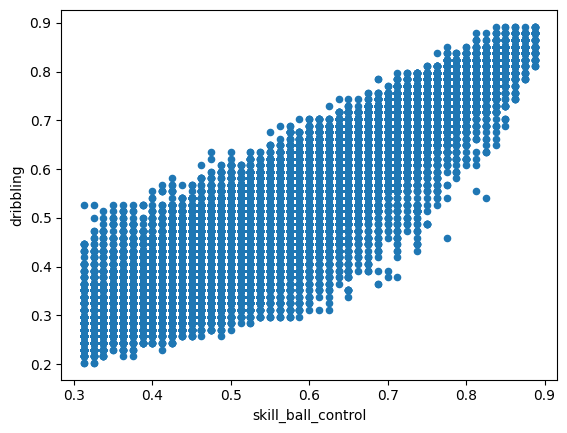

In [43]:
df.plot.scatter(x="skill_ball_control", y="dribbling")

<Axes: xlabel='skill_ball_control', ylabel='skill_dribbling'>

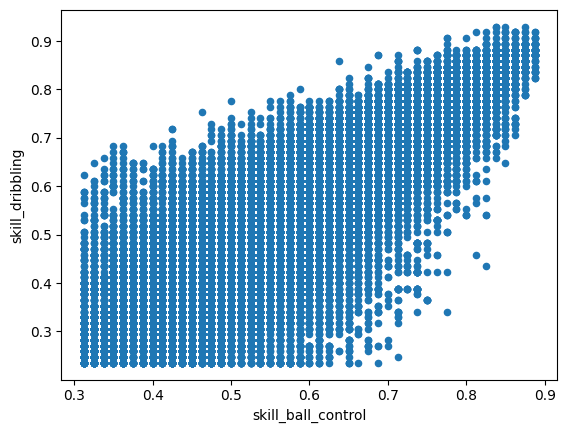

In [44]:
df.plot.scatter(x="skill_ball_control", y="skill_dribbling")


Como nãoencontramos uma multi de relaçao binária, o que vamos fazer é fazer a remoção de outliers multivariados com o Mahalanobis

In [45]:
from scipy.spatial.distance import mahalanobis
import seaborn as sns


def mahalanobis_distance(df, columns):
    cov_matrix = np.cov(df[columns].values.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_distr = df[columns].mean(axis=0)
    distances = df[columns].apply(lambda row: mahalanobis(row, mean_distr, inv_cov_matrix), axis=1)
    return distances

def remove_multi_outliers(df, columns):
    # Calcular a distância de Mahalanobis para cada ponto
    df['mahalanobis_dist'] = mahalanobis_distance(df, columns)

    # Determinar o limiar para outliers (usamos um valor alto como threshold)
    threshold = df['mahalanobis_dist'].mean() + 3 * df['mahalanobis_dist'].std()

    # Visualizar os outliers no gráfico de dispersão antes da remoção
    sns.pairplot(df[columns])
    plt.suptitle('Antes da Remoção de Outliers', y=1.02)
    plt.show()

    # Remover os outliers do DataFrame
    df_cleaned = df[df['mahalanobis_dist'] <= threshold]

    # Visualizar os gráficos de dispersão após a remoção dos outliers
    sns.pairplot(df_cleaned[columns])
    plt.suptitle('Após a Remoção de Outliers', y=1.02)
    plt.show()

    # Remover a coluna de distância de Mahalanobis após a limpeza
    df_cleaned = df_cleaned.drop(columns=['mahalanobis_dist'])
    return df_cleaned

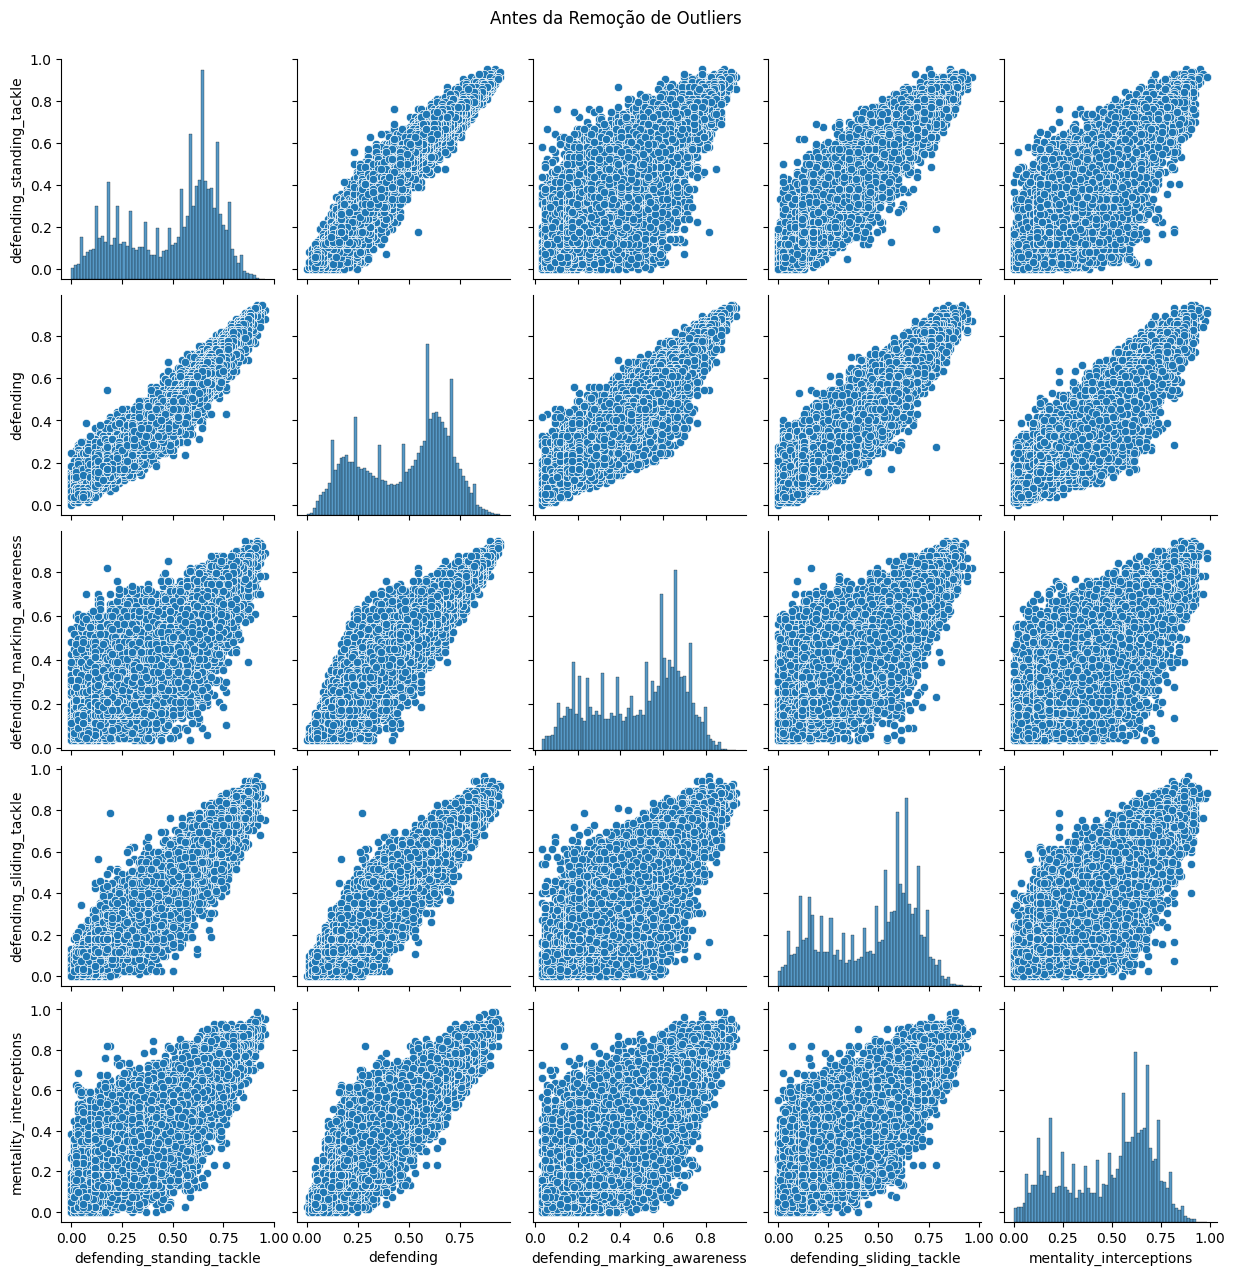

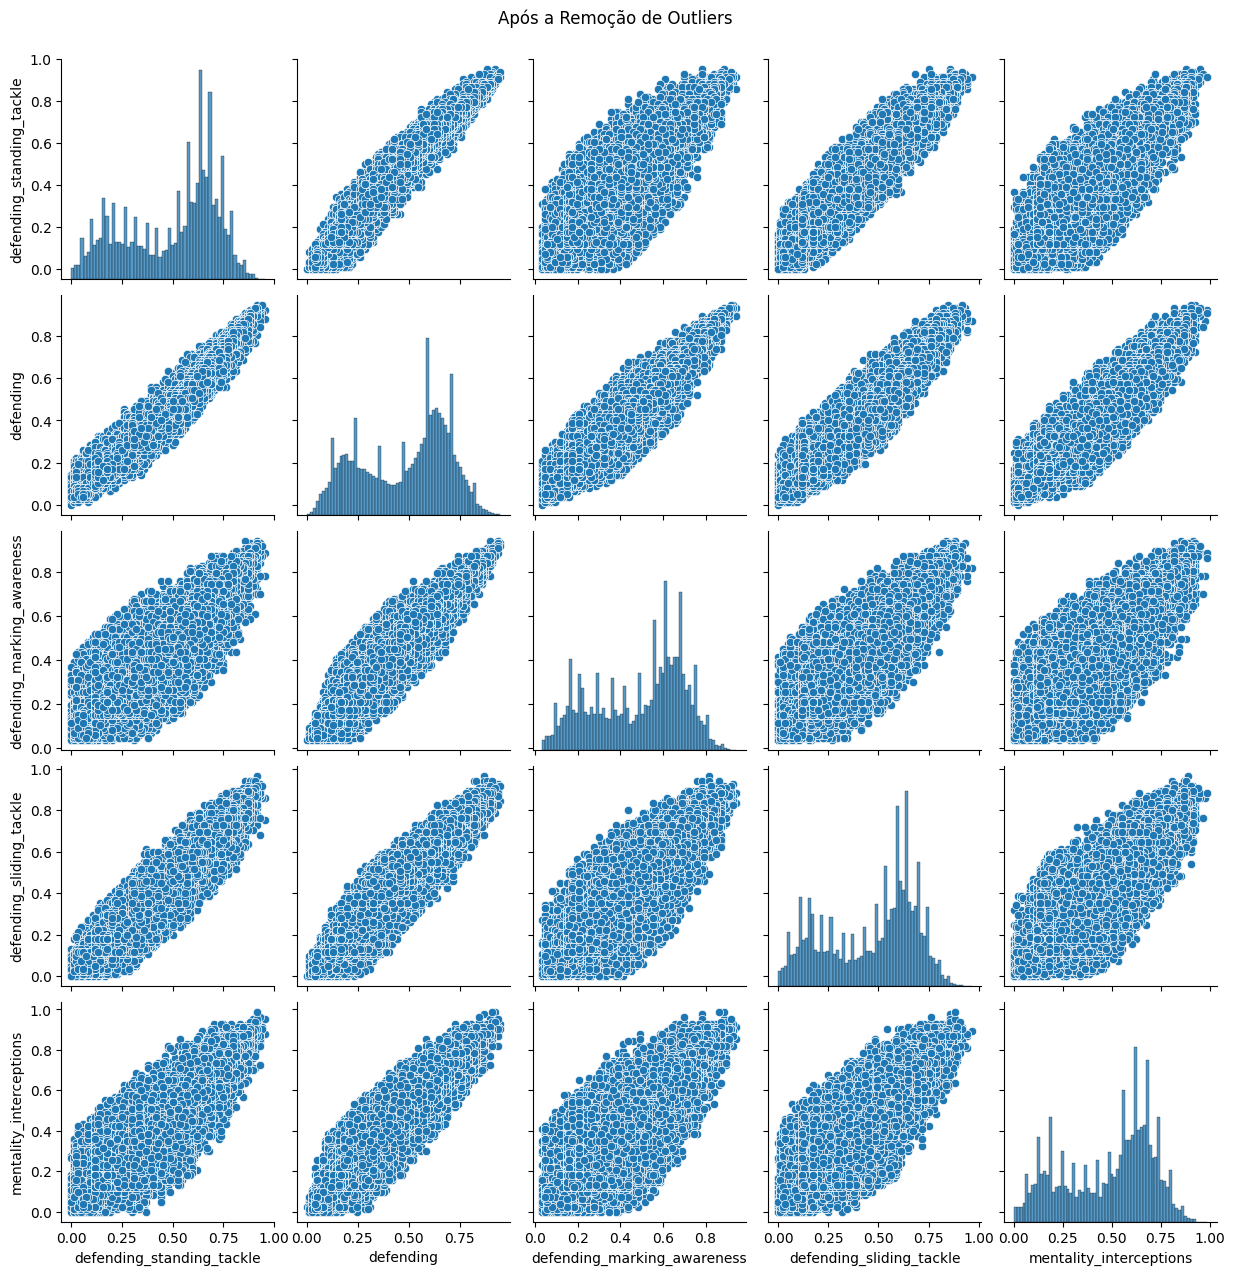

In [46]:
df = remove_multi_outliers(df,
    ['defending_standing_tackle', 'defending', 'defending_marking_awareness', 'defending_sliding_tackle', 'mentality_interceptions'])

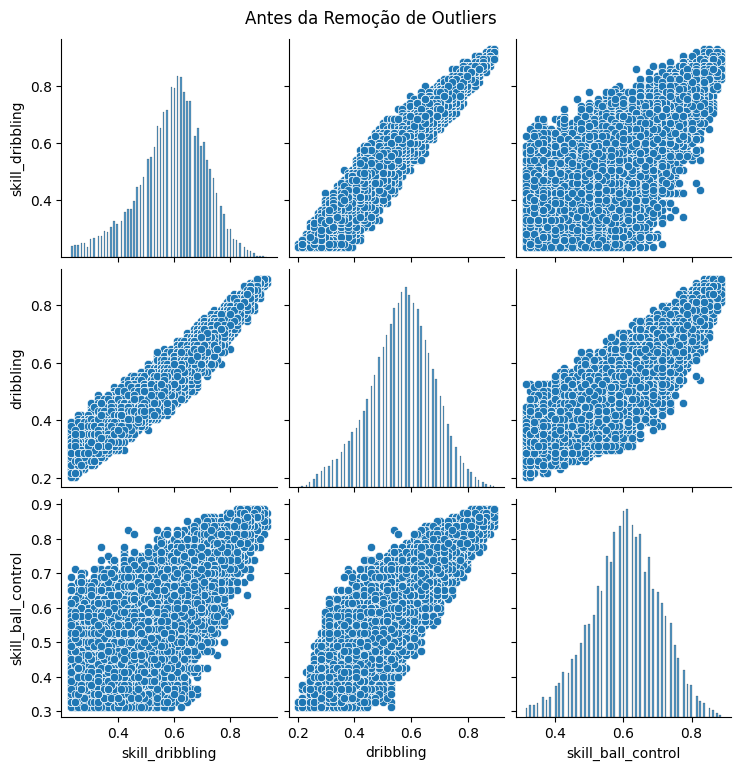

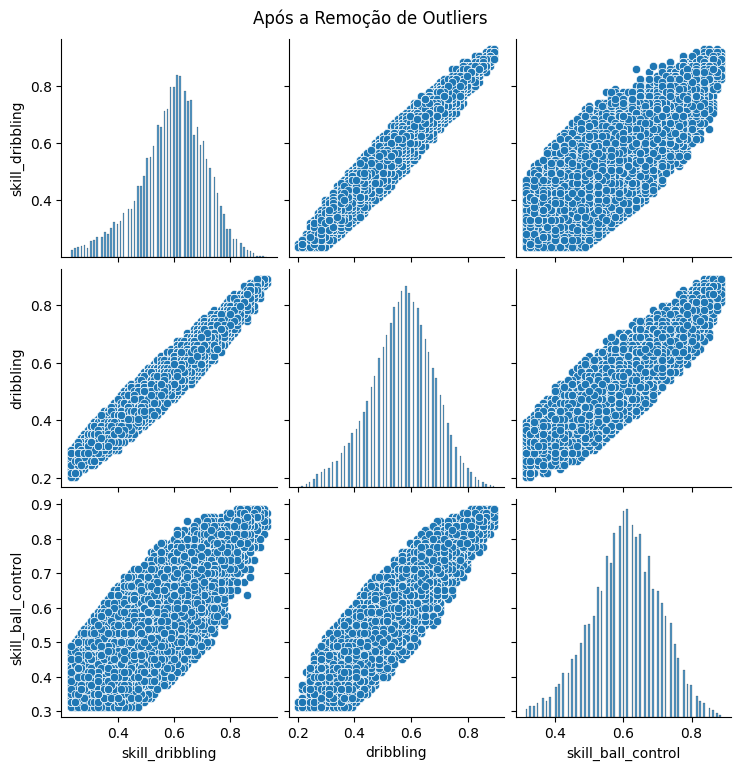

In [47]:
df = remove_multi_outliers(df,
                           ["skill_dribbling", "dribbling", "skill_ball_control"])

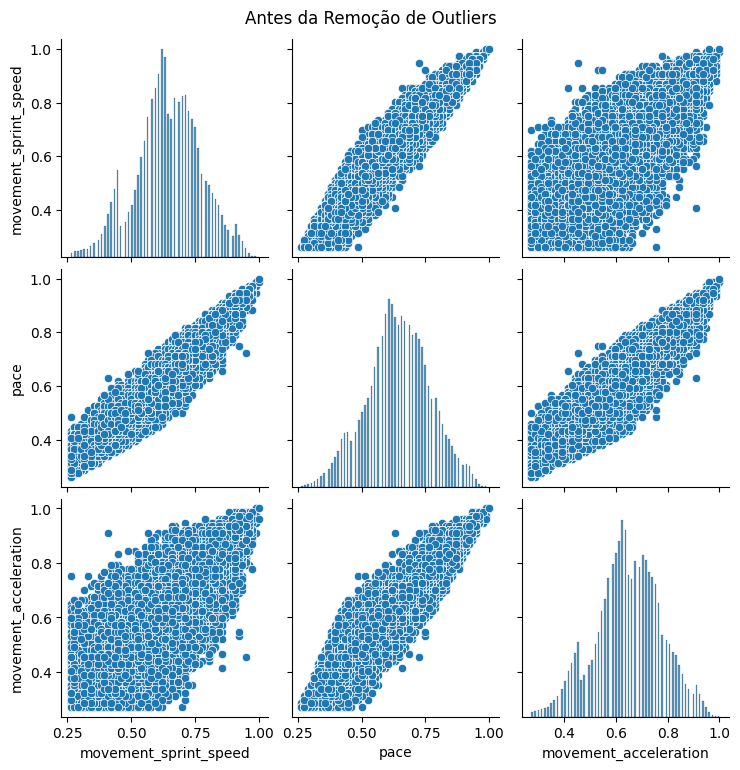

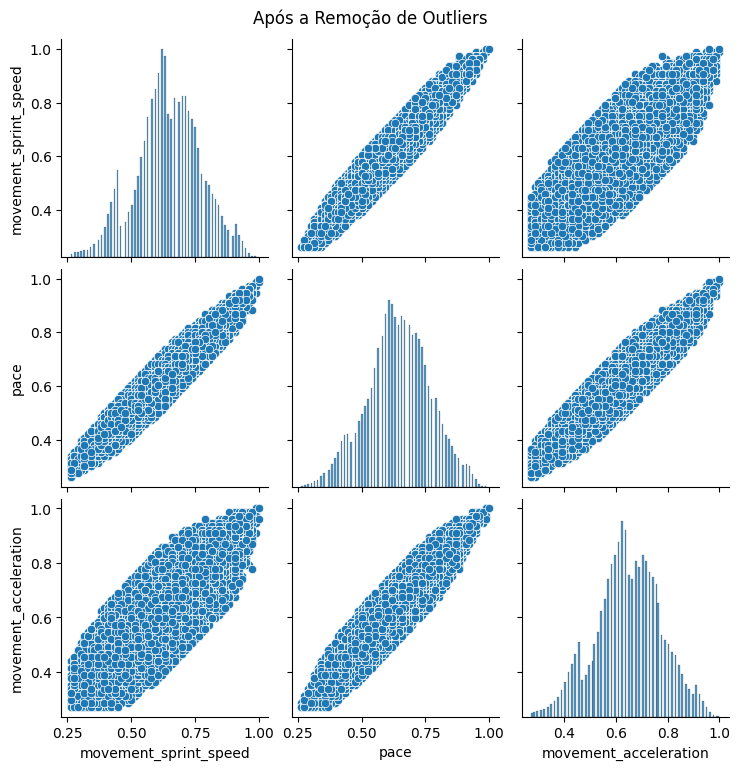

In [48]:
df = remove_multi_outliers(df,
                           ["movement_sprint_speed", "pace","movement_acceleration"])

#Estatísticas descritivas

In [51]:
df['overall'].describe()

count    129574.000000
mean          0.485572
std           0.117354
min           0.148148
25%           0.407407
50%           0.481481
75%           0.574074
max           0.796296
Name: overall, dtype: float64

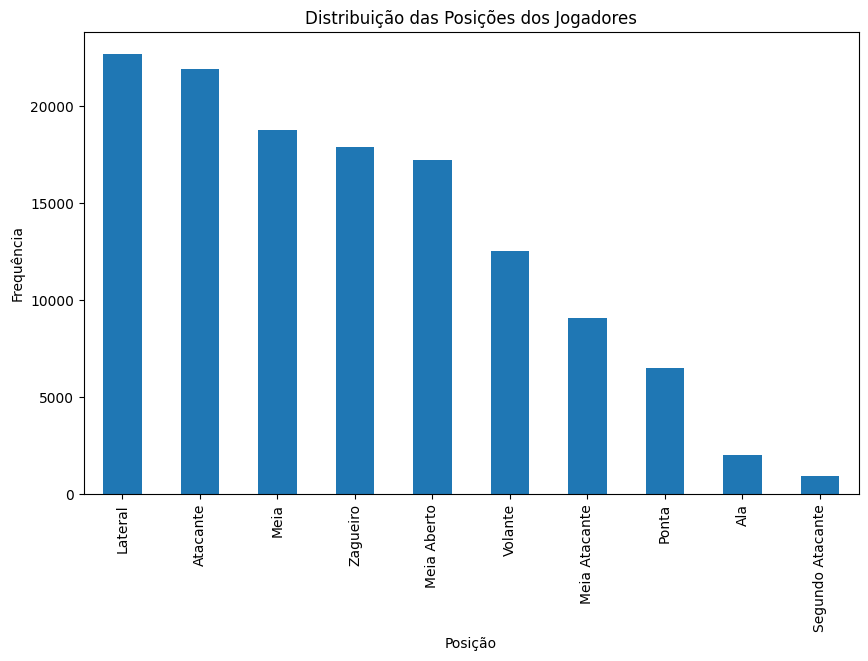

In [89]:
position_counts = df['player_positions'].value_counts()
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.title('Distribuição das Posições dos Jogadores')
plt.xlabel('Posição')
plt.ylabel('Frequência')
plt.show()

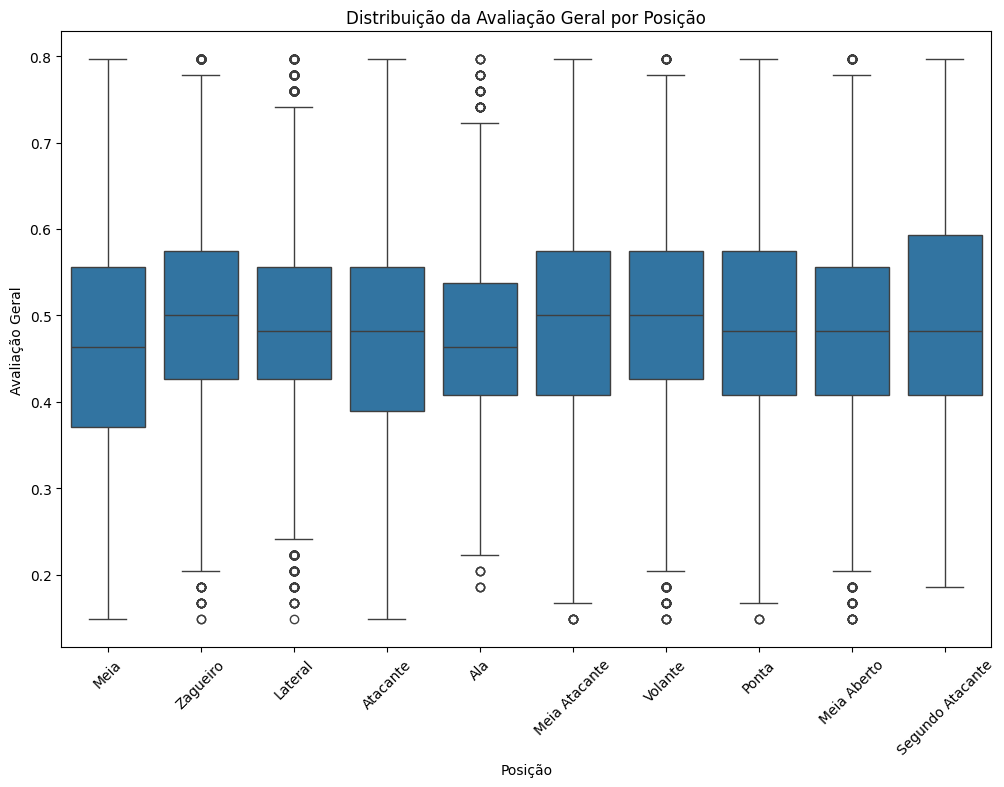

In [90]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='player_positions', y='overall', data=df)
plt.title('Distribuição da Avaliação Geral por Posição')
plt.xlabel('Posição')
plt.ylabel('Avaliação Geral')
plt.xticks(rotation=45)
plt.show()

In [64]:
defense_above_mean = df[df.defending > df.defending.mean()]

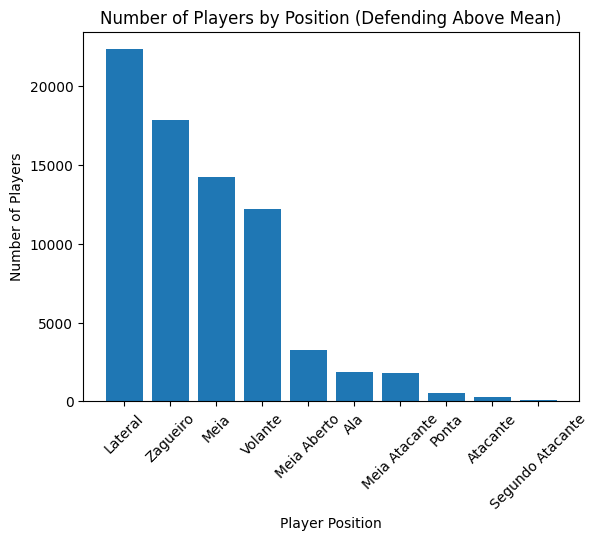

In [65]:
# Calculate the number of players for each position in defense_above_mean
player_positions = defense_above_mean['player_positions'].value_counts()

# Create a bar chart
plt.bar(player_positions.index, player_positions.values)

# Set the title and axis labels
plt.title('Number of Players by Position (Defending Above Mean)')
plt.xlabel('Player Position')
plt.ylabel('Number of Players')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Analisando esse gráfico, confirma-se uma suposição de que jogadores que atua da faixa central do campo para trás, são os que tem maior poder de marcação

In [66]:
shooting_above_mean = df[df.shooting > df.shooting.mean()]

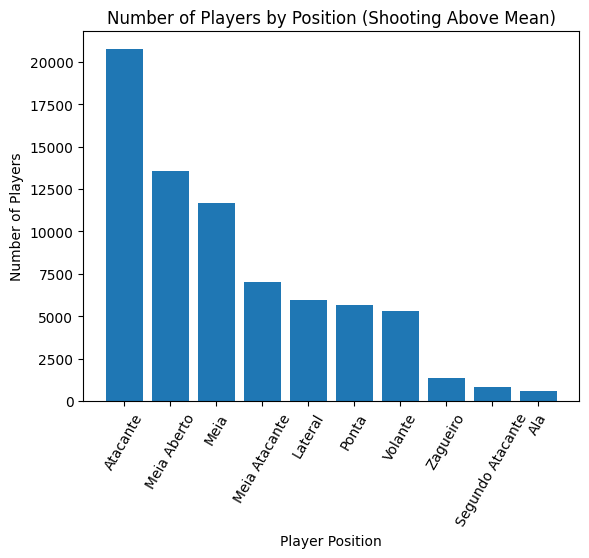

In [69]:
# Calculate the number of players for each position in defense_above_mean
player_positions = shooting_above_mean['player_positions'].value_counts()

# Create a bar chart
plt.bar(player_positions.index, player_positions.values)

# Set the title and axis labels
plt.title('Number of Players by Position (Shooting Above Mean)')
plt.xlabel('Player Position')
plt.ylabel('Number of Players')

# Rotate the x-axis labels for readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


Nesse caso uma suposição minha foi contraditada, sendo essa o pensamento de que os Segundos Atacantes teriam uma finalização superior aos jogadores ofensivos. Porém, outra foi confirmada, Atacantes tem o maior poder de finalização, em geral

In [79]:
df[df.player_positions == 'Segundo Atacante'].count()

player_positions               902
overall                        902
pace                           902
shooting                       902
passing                        902
dribbling                      902
defending                      902
physic                         902
attacking_crossing             902
attacking_finishing            902
attacking_heading_accuracy     902
attacking_short_passing        902
attacking_volleys              902
skill_dribbling                902
skill_curve                    902
skill_fk_accuracy              902
skill_long_passing             902
skill_ball_control             902
movement_acceleration          902
movement_sprint_speed          902
movement_agility               902
movement_reactions             902
movement_balance               902
power_shot_power               902
power_jumping                  902
power_stamina                  902
power_strength                 902
power_long_shots               902
mentality_aggression

In [76]:
shooting_above_mean[shooting_above_mean.player_positions == 'Segundo Atacante'].count()

player_positions               828
overall                        828
pace                           828
shooting                       828
passing                        828
dribbling                      828
defending                      828
physic                         828
attacking_crossing             828
attacking_finishing            828
attacking_heading_accuracy     828
attacking_short_passing        828
attacking_volleys              828
skill_dribbling                828
skill_curve                    828
skill_fk_accuracy              828
skill_long_passing             828
skill_ball_control             828
movement_acceleration          828
movement_sprint_speed          828
movement_agility               828
movement_reactions             828
movement_balance               828
power_shot_power               828
power_jumping                  828
power_stamina                  828
power_strength                 828
power_long_shots               828
mentality_aggression

Com essa nova análise sobre a quantidade de jogadores dessa posição e a quantidade que possui o atributo de chute acima da média, percebe-se que em número absolutos o valor no gráfico é pequeno, devido ao fato de que esse posicionamento é raro no FIFA, proporcionalmente os Segundos Atacantes com chute acima da média representa mais de 90% de todos os jogadores desta posição

In [70]:
dribbling_above_mean = df[df.dribbling > df.dribbling.mean()]

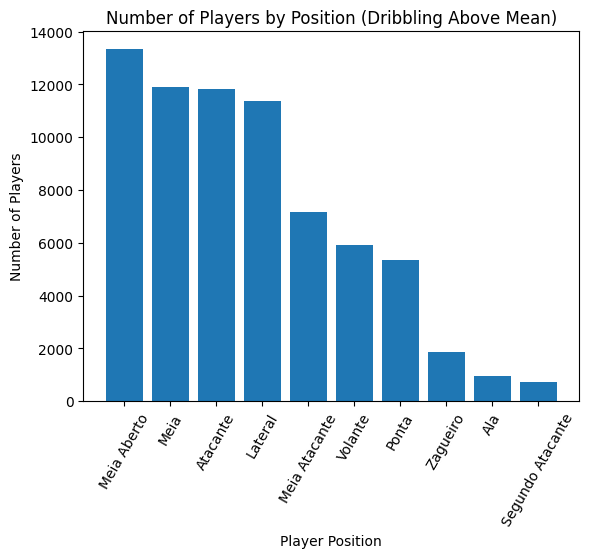

In [71]:
# Calculate the number of players for each position in defense_above_mean
player_positions = dribbling_above_mean['player_positions'].value_counts()

# Create a bar chart
plt.bar(player_positions.index, player_positions.values)

# Set the title and axis labels
plt.title('Number of Players by Position (Dribbling Above Mean)')
plt.xlabel('Player Position')
plt.ylabel('Number of Players')

# Rotate the x-axis labels for readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


In [80]:
dribbling_above_mean[dribbling_above_mean.player_positions == 'Segundo Atacante'].count()

player_positions               719
overall                        719
pace                           719
shooting                       719
passing                        719
dribbling                      719
defending                      719
physic                         719
attacking_crossing             719
attacking_finishing            719
attacking_heading_accuracy     719
attacking_short_passing        719
attacking_volleys              719
skill_dribbling                719
skill_curve                    719
skill_fk_accuracy              719
skill_long_passing             719
skill_ball_control             719
movement_acceleration          719
movement_sprint_speed          719
movement_agility               719
movement_reactions             719
movement_balance               719
power_shot_power               719
power_jumping                  719
power_stamina                  719
power_strength                 719
power_long_shots               719
mentality_aggression

a

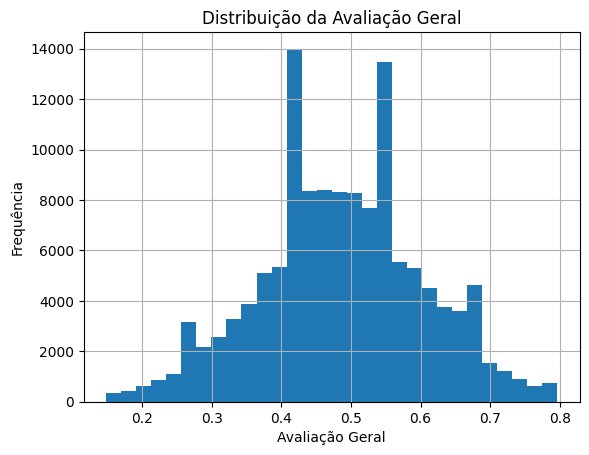

In [82]:
df['overall'].hist(bins=30)
plt.title('Distribuição da Avaliação Geral')
plt.xlabel('Avaliação Geral')
plt.ylabel('Frequência')
plt.show()

#Estatísticas Bivariadas

In [91]:
df[numeric_cols].cov()

,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
overall,0.013772,0.003259,0.008198,0.009617,0.008456,0.008559,0.008485,0.009107,0.006782,0.007226,...,0.009319,0.008646,0.009082,0.007690,0.007949,0.005618,0.008656,0.007545,0.007711,0.006709
pace,0.003259,0.015007,0.005826,0.003206,0.006837,-0.006654,-0.002245,0.007003,0.006744,-0.003367,...,0.004949,-0.003117,-0.006378,0.007041,0.003379,0.002761,0.001322,-0.006023,-0.006662,-0.006278
shooting,0.008198,0.005826,0.024922,0.010588,0.012514,-0.014595,-0.000017,0.009416,0.026401,0.001886,...,0.024509,-0.002560,-0.013598,0.019655,0.014214,0.017014,0.007485,-0.014306,-0.015801,-0.016705
passing,0.009617,0.003206,0.010588,0.014754,0.010571,0.006237,0.002932,0.014805,0.008878,0.000234,...,0.013223,0.005216,0.007535,0.010593,0.013813,0.006903,0.007803,0.005519,0.006436,0.005552
dribbling,0.008456,0.006837,0.012514,0.010571,0.012346,-0.002910,0.000014,0.011331,0.012474,-0.000622,...,0.013163,0.000641,-0.001950,0.012539,0.011142,0.008016,0.006572,-0.002934,-0.003128,-0.003639
defending,0.008559,-0.006654,-0.014595,0.006237,-0.002910,0.046461,0.016316,0.005795,-0.020387,0.008361,...,-0.008818,0.023395,0.046494,-0.011224,-0.001152,-0.011531,0.004955,0.043665,0.047676,0.046353
physic,0.008485,-0.002245,-0.000017,0.002932,0.000014,0.016316,0.019844,0.001448,-0.002465,0.011193,...,0.001542,0.017394,0.016517,-0.000061,0.000830,-0.000446,0.005476,0.014570,0.015402,0.014199
attacking_crossing,0.009107,0.007003,0.009416,0.014805,0.011331,0.005795,0.001448,0.022897,0.007796,-0.001846,...,0.011866,0.003818,0.006980,0.011297,0.011461,0.005782,0.006598,0.005393,0.006156,0.005894
attacking_finishing,0.006782,0.006744,0.026401,0.008878,0.012474,-0.020387,-0.002465,0.007796,0.030609,0.000962,...,0.023269,-0.006238,-0.019590,0.020850,0.013724,0.017707,0.006434,-0.019640,-0.021750,-0.022557
attacking_heading_accuracy,0.007226,-0.003367,0.001886,0.000234,-0.000622,0.008361,0.011193,-0.001846,0.000962,0.017564,...,0.001412,0.009154,0.007201,0.000485,-0.000973,0.002666,0.004286,0.006568,0.006273,0.005746


In [92]:
df[numeric_cols].corr(method='spearman')

,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
overall,1.000000,0.233202,0.466185,0.673632,0.666590,0.390822,0.508396,0.538909,0.345425,0.457121,...,0.503348,0.462874,0.403402,0.507597,0.532145,0.337376,0.675598,0.354990,0.366178,0.324932
pace,0.233202,1.000000,0.301806,0.215447,0.498757,-0.238711,-0.126151,0.387521,0.315927,-0.195247,...,0.227436,-0.145670,-0.221897,0.368905,0.192208,0.172761,0.102031,-0.225197,-0.226860,-0.207705
shooting,0.466185,0.301806,1.000000,0.534668,0.703022,-0.406999,0.006999,0.384046,0.954065,0.118422,...,0.886051,-0.084001,-0.355073,0.832872,0.636573,0.779060,0.432845,-0.417516,-0.417097,-0.455109
passing,0.673632,0.215447,0.534668,1.000000,0.777339,0.241175,0.167758,0.789550,0.393860,0.014616,...,0.640717,0.258357,0.284985,0.574379,0.859955,0.400093,0.587715,0.216945,0.236173,0.205550
dribbling,0.666590,0.498757,0.703022,0.777339,1.000000,-0.083902,0.010829,0.666645,0.623542,-0.026637,...,0.684919,0.052423,-0.036751,0.738980,0.737880,0.509317,0.547949,-0.094710,-0.081516,-0.105808
defending,0.390822,-0.238711,-0.406999,0.241175,-0.083902,1.000000,0.567824,0.187143,-0.531232,0.338079,...,-0.192411,0.667931,0.958284,-0.301226,-0.003893,-0.368353,0.246979,0.970886,0.980024,0.963501
physic,0.508396,-0.126151,0.006999,0.167758,0.010829,0.567824,1.000000,0.075864,-0.097576,0.600257,...,0.085336,0.765635,0.552633,0.036575,0.062869,-0.029844,0.356713,0.526762,0.531382,0.495599
attacking_crossing,0.538909,0.387521,0.384046,0.789550,0.666645,0.187143,0.075864,1.000000,0.278503,-0.069101,...,0.457582,0.156646,0.212794,0.475325,0.555228,0.271812,0.406877,0.176640,0.186000,0.189449
attacking_finishing,0.345425,0.315927,0.954065,0.393860,0.623542,-0.531232,-0.097576,0.278503,1.000000,0.068823,...,0.748066,-0.209386,-0.484218,0.791949,0.541225,0.733029,0.329763,-0.532681,-0.537819,-0.570883
attacking_heading_accuracy,0.457121,-0.195247,0.118422,0.014616,-0.026637,0.338079,0.600257,-0.069101,0.068823,1.000000,...,0.095017,0.430537,0.286073,0.090030,-0.041441,0.141408,0.289496,0.282668,0.277014,0.254316


In [93]:
df[numeric_cols].corr(method='pearson')

,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
overall,1.000000,0.226700,0.442487,0.674699,0.648454,0.338354,0.513256,0.512841,0.330330,0.464629,...,0.461843,0.450896,0.344855,0.433227,0.505059,0.343811,0.681771,0.307980,0.291386,0.257134
pace,0.226700,1.000000,0.301261,0.215438,0.502316,-0.252008,-0.130101,0.377804,0.314659,-0.207385,...,0.234948,-0.155741,-0.232006,0.380018,0.205669,0.161883,0.099759,-0.235502,-0.241145,-0.230506
shooting,0.442487,0.301261,1.000000,0.552153,0.713434,-0.428906,-0.000778,0.394181,0.955865,0.090159,...,0.902923,-0.099231,-0.383836,0.823166,0.671313,0.774029,0.438213,-0.434085,-0.443851,-0.475974
passing,0.674699,0.215438,0.552153,1.000000,0.783246,0.238202,0.171345,0.805512,0.417769,0.014544,...,0.633136,0.262807,0.276429,0.576568,0.847890,0.408141,0.593739,0.217659,0.234983,0.205615
dribbling,0.648454,0.502316,0.713434,0.783246,1.000000,-0.121494,0.000904,0.673908,0.641662,-0.042212,...,0.688957,0.035315,-0.078212,0.746074,0.747633,0.518121,0.546656,-0.126506,-0.124851,-0.147304
defending,0.338354,-0.252008,-0.428906,0.238202,-0.121494,1.000000,0.537364,0.177686,-0.540595,0.292697,...,-0.237912,0.664251,0.961226,-0.344268,-0.039855,-0.384203,0.212453,0.970363,0.980852,0.967286
physic,0.513256,-0.130101,-0.000778,0.171345,0.000904,0.537364,1.000000,0.067946,-0.100011,0.599555,...,0.063652,0.755689,0.522510,-0.002882,0.043916,-0.022714,0.359297,0.495427,0.484860,0.453372
attacking_crossing,0.512841,0.377804,0.394181,0.805512,0.673908,0.177686,0.067946,1.000000,0.294485,-0.092037,...,0.456053,0.154401,0.205557,0.493615,0.564722,0.274424,0.403010,0.170706,0.180412,0.175198
attacking_finishing,0.330330,0.314659,0.955865,0.417769,0.641662,-0.540595,-0.100011,0.294485,1.000000,0.041498,...,0.773515,-0.218206,-0.498963,0.787911,0.584855,0.726883,0.339912,-0.537715,-0.551287,-0.579916
attacking_heading_accuracy,0.464629,-0.207385,0.090159,0.014544,-0.042212,0.292697,0.599555,-0.092037,0.041498,1.000000,...,0.061955,0.422702,0.242142,0.024213,-0.054726,0.144502,0.298910,0.237406,0.209890,0.195015


<Axes: xlabel='shooting', ylabel='attacking_volleys'>

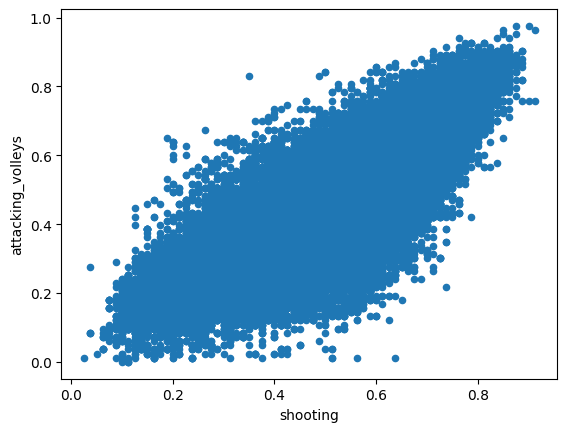

In [94]:
df.plot.scatter(x='shooting', y='attacking_volleys')

<Axes: xlabel='defending', ylabel='physic'>

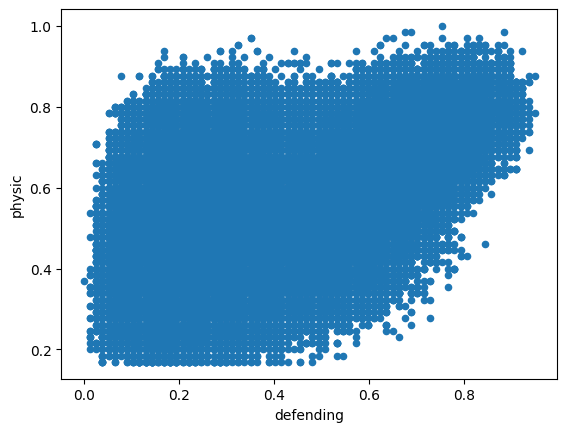

In [95]:
df.plot.scatter(x='defending', y='physic')

#Teste de hipóteses

In [96]:
from scipy import stats

### Hipóteses

**Hipótese Nula (H0)**: A média de 'shooting' dos atacantes é igual à média de 'shooting' dos zagueiros.

$ H_0: \mu_{\text{atacantes}} = \mu_{\text{zagueiros}} $

**Hipótese Alternativa (H1)**: A média de 'shooting' dos atacantes é diferente da média de 'shooting' dos zagueiros.

$ H_1: \mu_{\text{atacantes}} \neq \mu_{\text{zagueiros}} $

### Interpretação do Teste

- **Se o valor p for menor do que o nível de significância escolhido (comumente $ \alpha = 0.05 $), rejeitamos a hipótese nula.** Isso significa que há evidências suficientes para concluir que a média de 'shooting' dos atacantes é diferente da média de 'shooting' dos zagueiros.
- **Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.** Isso significa que não há evidências suficientes para concluir que as médias são diferentes.


In [98]:
# Exemplo: comparar a média de 'shooting' entre atacantes e zagueiros
attackers = df[df['player_positions'] == 'Atacante']['shooting']
defenders = df[df['player_positions'] == 'Zagueiro']['shooting']

# Teste t de Student
t_stat, p_value = stats.ttest_ind(attackers, defenders)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 324.2795547079869, P-Value: 0.0


### Resultado do Teste

Dado o valor t extremamente alto e o valor p próximo de zero, podemos rejeitar a hipótese nula (H0) de que as médias de 'shooting' para atacantes e zagueiros são iguais. Em outras palavras, a média de 'shooting' é significativamente diferente entre atacantes e zagueiros.

Isso sugere que, em média, os atacantes têm uma habilidade de chute ('shooting') diferente (provavelmente maior) comparado aos zagueiros, o que faz sentido intuitivo, já que a habilidade de chute é mais crítica para atacantes do que para zagueiros.

### Hipóteses

**Hipótese Nula (H0)**: As médias de 'overall' são iguais entre as diferentes posições.
$ H_0: \mu_{\text{Atacante}} = \mu_{\text{Zagueiro}} = \mu_{\text{Meia}} = \mu_{\text{Volante}} $

**Hipótese Alternativa (H1)**: Pelo menos uma das médias de 'overall' é diferente entre as diferentes posições.

$ H_1 $: **Pelo menos uma média é diferente**

### Interpretação do Teste

- **Se o valor p for menor do que o nível de significância escolhido (comumente $\alpha = 0.05) $, rejeitamos a hipótese nula.** Isso significa que há evidências suficientes para concluir que pelo menos uma das médias de 'overall' é diferente entre as posições de 'Atacante', 'Zagueiro', 'Meia' e 'Volante'.
- **Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.** Isso significa que não há evidências suficientes para concluir que as médias de 'overall' são diferentes entre essas posições.




In [108]:
# Exemplo: comparar a média de 'defending' entre diferentes posições
positions = ['Atacante', 'Zagueiro', 'Meia', 'Volante']
samples = [df[df['player_positions'] == pos]['overall'] for pos in positions]

# ANOVA
f_stat, p_value = stats.f_oneway(*samples)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


F-Statistic: 580.328601193827, P-Value: 0.0


### Resultado do Teste

Dado que o valor p é 0.0 (muito menor do que 0.05) e a estatística F (F-Statistic) é 98689.0922636158, rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1). Isso significa que há uma diferença significativa na média de 'overall' entre pelo menos duas das posições analisadas ('Atacante', 'Zagueiro', 'Meia', 'Volante'). A estatística F muito alta indica que a variabilidade entre as médias das posições é muito maior do que a variabilidade dentro das posições.

### Hipóteses

**Hipótese Nula (H0)**: A distribuição da variável 'pace' é normal.
$ H_0: \text{A distribuição de 'pace' é normal} $

**Hipótese Alternativa (H1)**: A distribuição da variável 'pace' não é normal.
$ H_1: \text{A distribuição de 'pace' não é normal} $

### Interpretação do Teste

- **Se o valor p for menor do que o nível de significância escolhido (comumente $\alpha = 0.05$), rejeitamos a hipótese nula.** Isso significa que há evidências suficientes para concluir que a distribuição da variável 'dribbling' não é normal.
- **Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.** Isso significa que não há evidências suficientes para concluir que a distribuição da variável 'dribbling' não é normal.



In [133]:
wingers = df[df['player_positions'] == 'Ponta']['pace']
side_middlefielders = df[df['player_positions'] == 'Meia Aberto']['pace']

# Exemplo: verificar a normalidade da distribuição de 'pace'
stat, p_value = stats.shapiro(wingers)
print(f"Shapiro-Wilk Statistic Wingers Pace: {stat}, P-Value: {p_value}")

stat, p_value = stats.shapiro(side_middlefielders)
print(f"Shapiro-Wilk Statistic Side Middlefielders Pace: {stat}, P-Value: {p_value}")

Shapiro-Wilk Statistic Wingers Pace: 0.9923231601715088, P-Value: 3.0083423573162888e-18
Shapiro-Wilk Statistic Side Middlefielders Pace: 0.9934809803962708, P-Value: 5.0633218239025415e-27


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Resultado do Teste

Dado que o valor p é 3.0083423573162888e-18 (muito menor do que 0.05) e a estatística de Shapiro-Wilk é 0.9923231601715088 para 'Pontas' e o valor p é 5.0633218239025415e-27 (muito menor do que 0.05) e a estatística de Shapiro-Wilk é 0.9934809803962708 para 'Meias Abertos', rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1). Isso significa que há uma diferença significativa na distribuição de 'pace' em relação a uma distribuição normal. A estatística de Shapiro-Wilk próxima de 1 indica que a distribuição não se desvia muito de uma distribuição normal, mas o valor p muito baixo indica que essa pequena diferença é estatisticamente significativa.

### Hipóteses

Como foi testado anteriormente que, o atributo 'pace' tanto para os 'Pontas' como para os 'Meias Abertos' não seguem uma Distribuição Normal, utilizando Shapiro-Wilk, é possível aplicar o teste de Mann-Whitney

**Hipótese Nula (H0)**: As medianas de 'pace' são iguais entre 'Pontas' e 'Meias Abertos'.
$ H_0: \text{mediana}_{\text{Ponta}} = \text{mediana}_{\text{Meia Aberto}} $

**Hipótese Alternativa (H1)**: As medianas de 'pace' são diferentes entre 'Pontas' e 'Meias Abertos'.
$ H_1: \text{mediana}_{\text{Ponta}} \neq \text{mediana}_{\text{Meia Aberto}} $

### Interpretação do Teste

- **Se o valor p for menor do que o nível de significância escolhido (comumente $ \alpha = 0.05 $), rejeitamos a hipótese nula.** Isso significa que há evidências suficientes para concluir que a mediana de 'pace' dos 'Pontas' é diferente da mediana de 'pace' dos 'Meias Abertos'.
- **Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.** Isso significa que não há evidências suficientes para concluir que as medianas de 'pace' são diferentes entre essas posições.



In [134]:
# Exemplo: comparar a mediana de 'pace' entre Pontas e Meias Abertos

# Teste de Mann-Whitney U
u_stat, p_value = stats.mannwhitneyu(wingers, side_middlefielders)
print(f"U-Statistic: {u_stat}, P-Value: {p_value}")


U-Statistic: 61510460.5, P-Value: 1.1344750221669917e-33


### Resultado do Teste

Dado que o valor p é 1.1344750221669917e-33 (muito menor do que 0.05) e a estatística U (U-Statistic) é 61510460.5, rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1). Isso significa que há uma diferença significativa na mediana de 'pace' entre 'Pontas' e 'Meias Abertos'. A estatística U muito alta, junto com um valor p tão baixo, indica uma diferença substancial entre as duas distribuições de 'pace'.

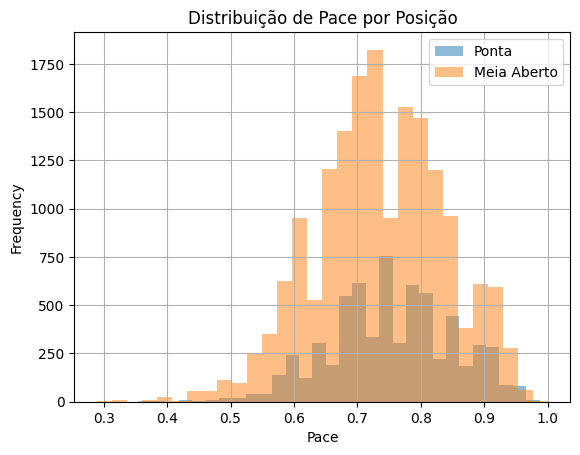

In [124]:
positions = ['Ponta', 'Meia Aberto']
for pos in positions:
    df[df['player_positions'] == pos]['pace'].hist(alpha=0.5, label=pos, bins=30)

plt.xlabel('Pace')
plt.ylabel('Frequency')
plt.title('Distribuição de Pace por Posição')
plt.legend()
plt.show()

### Hipóteses

**Hipótese Nula (H0)**: As distribuições de 'dribbling' são iguais entre atacantes e zagueiros.
$ H_0: \text{As distribuições de 'dribbling' são iguais entre atacantes e zagueiros} $

**Hipótese Alternativa (H1)**: As distribuições de 'dribbling' são diferentes entre atacantes e zagueiros.
$ H_1: \text{As distribuições de 'dribbling' são diferentes entre atacantes e zagueiros} $

### Interpretação do Teste

- **Se o valor p for menor do que o nível de significância escolhido (comumente $ \alpha = 0.05 $), rejeitamos a hipótese nula.** Isso significa que há evidências suficientes para concluir que as distribuições de 'dribbling' são diferentes entre atacantes e zagueiros.
- **Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.** Isso significa que não há evidências suficientes para concluir que as distribuições de 'dribbling' são diferentes entre essas posições.



In [131]:
# Exemplo: comparar a distribuição de 'dribbling' entre atacantes e zagueiros
attackers = df[df['player_positions'] == 'Atacante']['dribbling']
defenders = df[df['player_positions'] == 'Zagueiro']['dribbling']

# Teste de Kolmogorov-Smirnov
ks_stat, p_value = stats.ks_2samp(attackers, defenders)
print(f"KS-Statistic: {ks_stat}, P-Value: {p_value}")


KS-Statistic: 0.5091147167676029, P-Value: 0.0


### Resultado do Teste

Dado que o valor p é 0.0 (muito menor do que 0.05) e a estatística KS (KS-Statistic) é 0.5091147167676029, rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1). Isso significa que há uma diferença significativa na distribuição de 'dribbling' entre atacantes e zagueiros. A estatística KS de 0.5091147167676029 indica que a maior diferença entre as distribuições acumuladas de 'dribbling' dos atacantes e zagueiros é de aproximadamente 0.509, o que é substancial.

### Hipóteses

**Hipótese Nula (H0)**: As medianas das avaliações de 'dribbling' e 'shooting' para os jogadores na posição 'Ponta' são iguais.

$ H_0: \text{mediana}_{\text{dribbling}} = \text{mediana}_{\text{shooting}} $

**Hipótese Alternativa (H1)**: As medianas das avaliações de 'dribbling' e 'shooting' para os jogadores na posição 'Ponta' são diferentes.

$ H_1: \text{mediana}_{\text{dribbling}} \neq \text{mediana}_{\text{shooting}} $

### Interpretação do Teste

- **Se o valor p for menor do que o nível de significância escolhido (comumente $\alpha = 0.05$), rejeitamos a hipótese nula.** Isso significa que há evidências suficientes para concluir que há uma diferença significativa nas medianas das avaliações de 'dribbling' e 'shooting' para os jogadores na posição 'Ponta'.
- **Se o valor p for maior ou igual ao nível de significância, não rejeitamos a hipótese nula.** Isso significa que não há evidências suficientes para concluir que há uma diferença significativa nas medianas das avaliações de 'dribbling' e 'shooting' para os jogadores na posição 'Ponta'.



In [135]:
from scipy.stats import wilcoxon

# Dados de exemplo: avaliações de 'dribbling' e 'shooting' para os mesmos jogadores
dribbling = df[df['player_positions'] == 'Ponta']['dribbling']
shooting = df[df['player_positions'] == 'Ponta']['shooting']

# Teste de Wilcoxon
w_stat, p_value = wilcoxon(dribbling, shooting)
print(f"Wilcoxon Statistic: {w_stat}, P-Value: {p_value}")


Wilcoxon Statistic: 3255035.5, P-Value: 0.0


### Resultado do Teste

Dado que o valor p é 0.0 (muito menor do que 0.05) e a estatística de Wilcoxon é 3255035.5, rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1). Isso significa que há uma diferença significativa nas medianas das avaliações de 'dribbling' e 'shooting' para os jogadores na posição 'Ponta'. A estatística de Wilcoxon muito alta, junto com um valor p tão baixo, indica uma diferença substancial entre as duas distribuições.